### Проект 3. Этап 3 (25 баллов)


**Описание**

Теперь объединим наработки с первого и второго этапов. Добавим в маршрут с первого этапа гастрономию - кафе/ресторан со второго этапа.

Нужно создать программу на языке Python, которая будет находить кратчайший пешеходный маршрут для посещения трех достопримечательностей в городе Екатеринбурге. В качестве дополнения к предыдущим этапам, в задачу добавляется четвертая точка - ваш ресторан с указанными координатами. Маршрут должен проходить последовательно через первые две достопримечательности, далее включать в себя ресторан/кафе и завершаться в третьей достопримечательности. Другими словами, маршрут принимает следующий вид: Достопримечательность_1 -> Достопримечательность_2 -> Ресторан/кафе -> Достопримечательность_3.

Также теперь появляется ограничение на количество поворотов направо (не более двух), которое обусловлено особенностями дорожной инфраструктуры в определенные периоды времени,  и общая длина маршрута (не более 12 км). Вам также необходимо самостоятельно реализовать алгоритм Дейкстры для поиска кратчайшего пути и использовать базовый функционал библиотеки OpenStreetMap (OSM) для работы с картой города, нахождения узлов в графе, обхода вершин и подсчета пройденного расстояния.

**Входные данные**

На вход поступают координаты трех точек на карте в OpenStreetMap. А также четвертая координата с прошлого этапа.

- координаты трех достопримечательностей:
    - "Башня Исеть": (56.84357, 60.59071),
    - "Здание администрации": (56.83720, 60.59766),
    - "Плотинка (Камень Любви)": (56.8377927, 60.6036443)
- координаты кафе/ресторана с прошлого этапа.
- maximum_length = 12000 (м)

**Выходные данные**

Ваша программа должна вывести кратчайший пешеходный маршрут, проходящий через все три достопримечательности и ресторан/кафе, а также координаты узлов (нод) графа, через которые этот маршрут проходит. Кроме того, выведите длину такого маршрута.


Может оказаться, что не существует маршрута, удовлетворяющего таким условиям.


**Технические детали**

- Координаты на вход поступают в виде кортежей (tuple).
- Вы должны предоставить полное решение в ноутбуке Google Colab и приложить свой код.


**Подсказки**

- Необходимо определить, в каком городе находятся заданные координаты, и выполнить поиск в OSM с использованием карты этого города.
- Допускается использование встроенного метода `ox.distance.nearest_nodes`, но алгоритм Дейкстры и подсчет расстояния предлагается реализовать самостоятельно.

**Пример ответа**

```
Такой маршрут есть:

(45.443544, 74.44556)
(45.44554, 74.44455)
(45.45564, 74.6754)
(45.987, 74.876555)
...

Расстояние 100м.
```

**Оценивание**

- Без вывода - 0 баллов.
- Корректная длина маршрута - 5 баллов.
- Функция Дейкстры - 2 балла.
- Учет числа поворотов направо - 8 баллов.
- Вывод корректных координат на пути - 9 баллов.
- Корректная оценка возможности построения такого маршрута - 1 балл.
- Полное выполнение - 25 баллов.

Для подсчета баллов простого вывода недостаточно: необходимо предоставить обоснование и приложить код.

Удачи в решении задачи!

In [ ]:
!pip install osmnx

In [ ]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.3'

In [ ]:
import pandas as pd
pd.options.display.max_columns = 100

In [ ]:
attractions = {"Башня_Исеть": (56.84357, 60.59071),
               "Здание_администрации": (56.83720, 60.59766),
               "Плотинка_Камень_Любви": (56.8377927, 60.6036443)}

In [ ]:
start = attractions['Башня_Исеть']
medium = attractions['Здание_администрации']
end = attractions['Плотинка_Камень_Любви']

print(start)
print(medium)
print(end)

(56.84357, 60.59071)
(56.8372, 60.59766)
(56.8377927, 60.6036443)


In [ ]:
X = 600
tags = {"amenity": "restaurant"}
cafes = ox.features_from_point(medium, tags, dist=X)
cafes = cafes.dropna(subset=['cuisine'])
cafes = cafes[cafes['cuisine'] != 'coffee_shop']
cafes = cafes[cafes['cuisine'] != 'regional']
popular_cuisine = (cafes['cuisine'].mode()[0])
cafe_list = cafes[cafes['cuisine'] == popular_cuisine]
our_cafe = cafe_list.sample(1, random_state=7)
our_cafe

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,,amenity,brand,brand:wikidata,brand:wikipedia,cuisine,name,operator,phone,smoking,website,geometry,wheelchair,name:en,name:ru,addr:housenumber,addr:street,internet_access,opening_hours,addr:postcode,contact:phone,contact:website,contact:email,addr:city,indoor_seating,outdoor_seating,contact:vk,website:menu,nodes,building,building:levels
element_type,osmid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
node,4674769922,restaurant,NaN,NaN,NaN,italian,Pepperoni Pizzeria & Bar,NaN,NaN,NaN,NaN,POINT (60.59625 56.83333),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(popular_cuisine)
print()
print('Ресторан/кафе для достопримечательности 2:', our_cafe['name'][0])
print()
print('Координаты ресторана:', str(our_cafe['geometry'][0])[6:])

italian

Ресторан/кафе для достопримечательности 2: Pepperoni Pizzeria & Bar

Координаты ресторана: (60.5962536 56.8333325)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
attractions[our_cafe['name'][0]] = (float(str(our_cafe['geometry'][0])[18:28]), float(str(our_cafe['geometry'][0])[7:17]))

In [ ]:
attractions

{'Башня_Исеть': (56.84357, 60.59071),
 'Здание_администрации': (56.8372, 60.59766),
 'Плотинка_Камень_Любви': (56.8377927, 60.6036443),
 'Pepperoni Pizzeria & Bar': (56.8333325, 60.5962536)}

In [ ]:
start = attractions['Башня_Исеть']
medium = attractions['Здание_администрации']
medium_rest = attractions['Pepperoni Pizzeria & Bar']
end = attractions['Плотинка_Камень_Любви']

print(start)
print(medium)
print(medium_rest)
print(end)

(56.84357, 60.59071)
(56.8372, 60.59766)
(56.8333325, 60.5962536)
(56.8377927, 60.6036443)


In [ ]:
origin_nodes = {}
for attraction, coordinates in attractions.items():
    G = ox.graph.graph_from_point(coordinates, dist=1000, dist_type="network", network_type="walk")
    origin_node = ox.distance.nearest_nodes(G, coordinates[1], coordinates[0])
    attractions[attraction] = (G.nodes[origin_node]["y"], G.nodes[origin_node]["x"])
    print(attraction, coordinates)
    print(origin_node, attractions[attraction])
    origin_nodes[attraction] = origin_node

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Башня_Исеть (56.84357, 60.59071)
5121112983 (56.8436053, 60.5912917)
Здание_администрации (56.8372, 60.59766)
783674133 (56.8373442, 60.5975434)
Плотинка_Камень_Любви (56.8377927, 60.6036443)
412069058 (56.8375431, 60.6033385)
Pepperoni Pizzeria & Bar (56.8333325, 60.5962536)
220677516 (56.8333542, 60.5958637)


In [ ]:
start = attractions['Башня_Исеть']
medium = attractions['Здание_администрации']
medium_rest = attractions['Pepperoni Pizzeria & Bar']
end = attractions['Плотинка_Камень_Любви']

print(start)
print(medium)
print(medium_rest)
print(end)

(56.8436053, 60.5912917)
(56.8373442, 60.5975434)
(56.8333542, 60.5958637)
(56.8375431, 60.6033385)


In [ ]:
origin_nodes_transponned = {}
for attraction, node in origin_nodes.items():
    origin_nodes_transponned[node] = attraction
colors = {}
colors['Башня_Исеть'] = 'b'
colors['Здание_администрации'] = 'g'
colors['Плотинка_Камень_Любви'] = 'r'
colors['Pepperoni Pizzeria & Bar'] = 'cyan'
radius = 5000
G = ox.graph.graph_from_point(attractions['Здание_администрации'], dist=radius, dist_type="network", network_type="walk")
nc = [colors[origin_nodes_transponned[node]] if node in origin_nodes.values() else "w" for node in G.nodes()]
ns = [40 if node in origin_nodes.values() else 5 for node in G.nodes()]
#fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc)

In [ ]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)

import pandas as pd
df_nodes = pd.DataFrame(gdf_nodes)
df_nodes.reset_index(inplace= True)

df_edges = pd.DataFrame(gdf_edges)
df_edges.reset_index(inplace= True)

adjacency_list = {}
for u in df_edges['u']:
    adjacency_list[str(u)] = {}
for u in df_edges['u']:
  for v in df_edges[df_edges['u'] == u]['v']:
    if len(df_edges[(df_edges['u'] == u)&(df_edges['v'] == v)]['length']) == 1:
      adjacency_list[str(u)][str(v)] = float(df_edges[(df_edges['u'] == u)&(df_edges['v'] == v)]['length'])

osmid_coord = {}
for node in adjacency_list.keys():
    osmid_coord[str(node)] = (float(df_nodes[df_nodes['osmid'] == int(node)]['y'].iloc[0]), float(df_nodes[df_nodes['osmid'] == int(node)]['x'].iloc[0]))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-137-8fe4551089a6>:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
<ipython-input-137-8fe4551089a6>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  adjacency_list[str(u)][str(v)] = float(df_edges[(df_edges['u'] == u)&(df_e

In [ ]:
max_turns_right = 3

In [ ]:
import sys

class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)

    def construct_graph(self, nodes, init_graph):
        graph = {}
        for node in nodes:
            graph[node] = {}
        graph.update(init_graph)
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
        return graph

    def get_nodes(self):
        return self.nodes

    def get_outgoing_edges(self, node):
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections

    def value(self, node1, node2):
        return self.graph[node1][node2]


def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
    shortest_path = {}
    previous_nodes = {}
    turns_right = {}
    max_value = sys.maxsize
    for node in unvisited_nodes:
        turns_right[node] = 0
        shortest_path[node] = max_value
    shortest_path[start_node] = 0
    while unvisited_nodes:
        current_min_node = None
        for node in unvisited_nodes:
            if current_min_node == None:
                current_min_node = node
            elif (shortest_path[node] < shortest_path[current_min_node]) and (turns_right[node] <= max_turns_right):
                current_min_node = node
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if (tentative_value < shortest_path[neighbor]) and (turns_right[current_min_node] <= max_turns_right):
                if current_min_node in previous_nodes.keys():
                    node1 = previous_nodes[current_min_node]
                    node2 = current_min_node
                    node3 = neighbor
                    vector1 = [osmid_coord[node2][0]-osmid_coord[node1][0], osmid_coord[node2][1]-osmid_coord[node1][1]]
                    vector2 = [osmid_coord[node3][0]-osmid_coord[node2][0], osmid_coord[node3][1]-osmid_coord[node2][1]]
                    if (abs(vector1[0]*vector2[0] + vector1[1]*vector2[1]) < 1e-7) and ((vector1[0]*vector2[1] - vector1[1]*vector2[0]) > 0):
                      if (turns_right[current_min_node] < max_turns_right):
                        turns_right[neighbor] = turns_right[current_min_node] + 1
                        shortest_path[neighbor] = tentative_value
                        previous_nodes[neighbor] = current_min_node
                    else:
                        turns_right[neighbor] = turns_right[current_min_node]
                        shortest_path[neighbor] = tentative_value
                        previous_nodes[neighbor] = current_min_node
                elif (turns_right[current_min_node] <= max_turns_right):
                  turns_right[neighbor] = turns_right[current_min_node]
                  shortest_path[neighbor] = tentative_value
                  previous_nodes[neighbor] = current_min_node
        unvisited_nodes.remove(current_min_node)
    return previous_nodes, shortest_path, turns_right



def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
    path.append(start_node)

    print("Найден следующий лучший маршрут с длиной %.1fм:" %(shortest_path[target_node]))
    for elem in reversed(path):
        print(osmid_coord[elem])


def return_path(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
    path.append(start_node)
    path = list(reversed(path))
    res = []
    for i in range(len(path) - 1):
        pair = (int(path[i]), int(path[i + 1]))
        res.append(pair)
    for i in range(len(path) - 1):
        pair = (int(path[i+1]), int(path[i]))
        res.append(pair)
    return(res)

**для max_turns_right = 1, 2 не получается даже путь 1 построить**

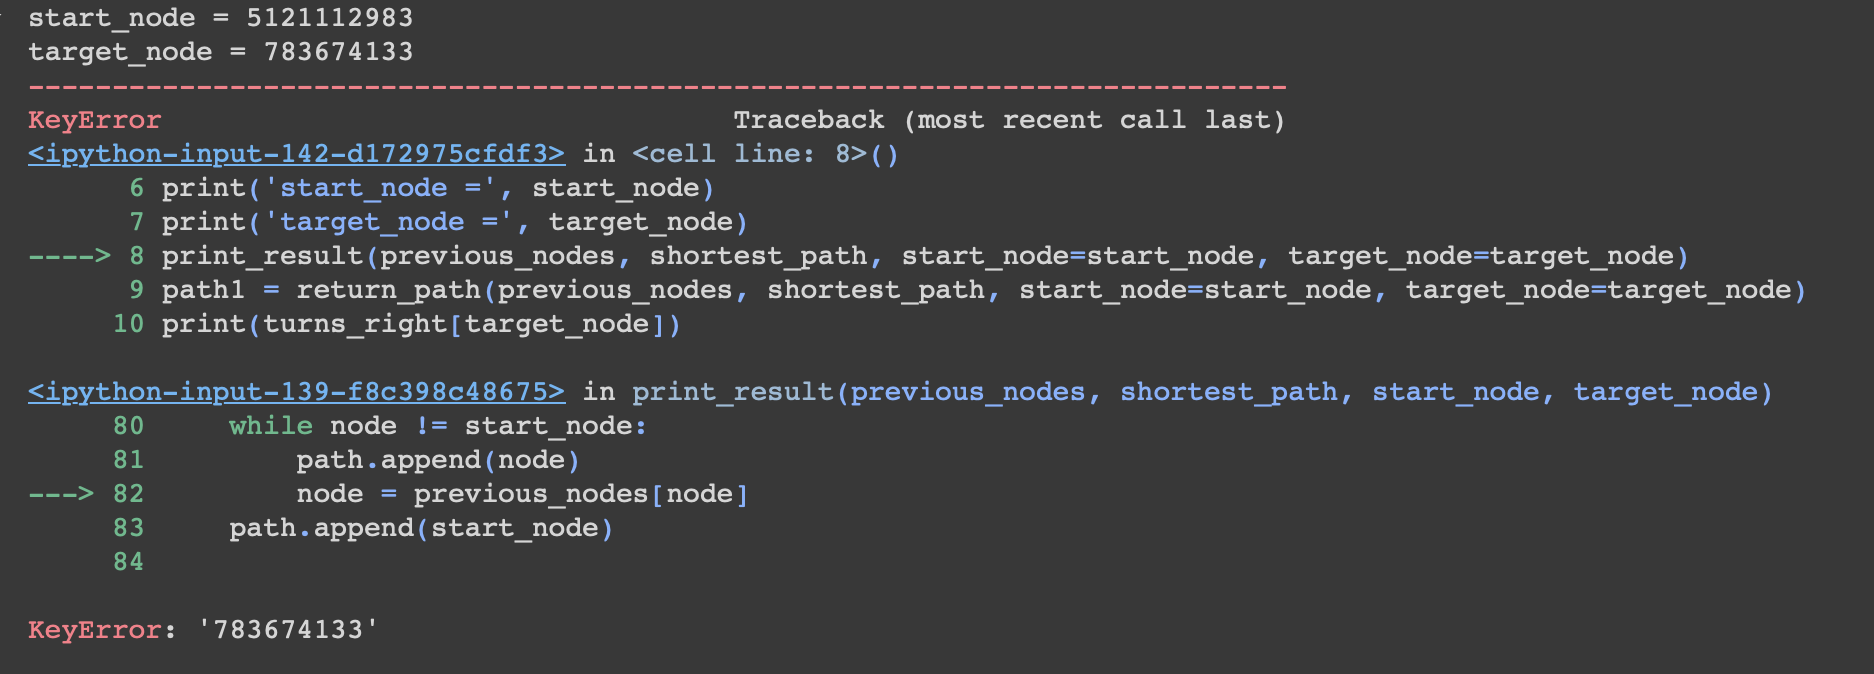

**Маршрут из Башни к зданию администрации**

In [ ]:
nodes = adjacency_list.keys()
graph = Graph(nodes, adjacency_list)
start_node = str(df_nodes[(df_nodes['y'] == start[0])&(df_nodes['x'] == start[1])]['osmid'].iloc[0])
target_node = str(df_nodes[(df_nodes['y'] == medium[0])&(df_nodes['x'] == medium[1])]['osmid'].iloc[0])
previous_nodes, shortest_path, turns_right = dijkstra_algorithm(graph=graph, start_node=start_node)
print('start_node =', start_node)
print('target_node =', target_node)
print_result(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
path1 = return_path(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
print('turns_right =', turns_right[target_node])

start_node = 5121112983
target_node = 783674133
Найден следующий лучший маршрут с длиной 1187.3м:
(56.8436053, 60.5912917)
(56.843552, 60.5914231)
(56.8425934, 60.5902261)
(56.8425403, 60.5903517)
(56.8425042, 60.5902695)
(56.842245, 60.5909166)
(56.8420603, 60.5913784)
(56.841978, 60.5916244)
(56.8418875, 60.5917617)
(56.8416647, 60.5922782)
(56.8415499, 60.5925564)
(56.8413274, 60.593147)
(56.8412544, 60.593328)
(56.8412058, 60.5934496)
(56.8411104, 60.5936904)
(56.8396051, 60.5944413)
(56.8394185, 60.5942458)
(56.8393748, 60.5943611)
(56.8387081, 60.5943847)
(56.8376346, 60.594653)
(56.8375947, 60.5947371)
(56.8376348, 60.5952729)
(56.8376795, 60.5957303)
(56.8376998, 60.5959327)
(56.837761, 60.5965869)
(56.8379429, 60.5984494)
(56.8375629, 60.5985817)
(56.8374572, 60.5975062)
(56.8373442, 60.5975434)
turns_right = 3


**Маршрут от здания администрации к Pepperoni Pizzeria & Bar**

In [ ]:
start_node = str(df_nodes[(df_nodes['y'] == medium[0])&(df_nodes['x'] == medium[1])]['osmid'].iloc[0])
target_node = str(df_nodes[(df_nodes['y'] == medium_rest[0])&(df_nodes['x'] == medium_rest[1])]['osmid'].iloc[0])
previous_nodes, shortest_path, turns_right = dijkstra_algorithm(graph=graph, start_node=start_node)
print_result(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
path2 = return_path(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
print('turns_right =', turns_right[target_node])

Найден следующий лучший маршрут с длиной 625.6м:
(56.8373442, 60.5975434)
(56.8372374, 60.5965114)
(56.8363561, 60.5968529)
(56.8363373, 60.5966871)
(56.8362084, 60.5966889)
(56.8361616, 60.5967039)
(56.8360844, 60.5967286)
(56.8360764, 60.5966577)
(56.8359131, 60.5950057)
(56.8354231, 60.5951697)
(56.8348928, 60.5953614)
(56.8339246, 60.5956947)
(56.8339072, 60.5955615)
(56.8333374, 60.5957558)
(56.8333542, 60.5958637)
turns_right = 3


**Маршрут от Pepperoni Pizzeria & Bar к плотинке**

In [ ]:
start_node = str(df_nodes[(df_nodes['y'] == medium_rest[0])&(df_nodes['x'] == medium_rest[1])]['osmid'].iloc[0])
target_node = str(df_nodes[(df_nodes['y'] == end[0])&(df_nodes['x'] == end[1])]['osmid'].iloc[0])
previous_nodes, shortest_path, turns_right = dijkstra_algorithm(graph=graph, start_node=start_node)
print_result(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
path3 = return_path(previous_nodes, shortest_path, start_node=start_node, target_node=target_node)
print('turns_right =', turns_right[target_node])

Найден следующий лучший маршрут с длиной 1070.2м:
(56.8333542, 60.5958637)
(56.8335435, 60.5959871)
(56.8337845, 60.5979441)
(56.833842, 60.5984575)
(56.8339875, 60.5996417)
(56.8341939, 60.5995616)
(56.8342756, 60.5997302)
(56.8343273, 60.6003078)
(56.8344421, 60.6002742)
(56.8347639, 60.6001577)
(56.8351152, 60.6000553)
(56.8353822, 60.5999649)
(56.8354084, 60.5999558)
(56.835482, 60.6005972)
(56.8355801, 60.6011382)
(56.8356369, 60.6016708)
(56.8356642, 60.6019273)
(56.8361152, 60.6018485)
(56.8361625, 60.6022966)
(56.8366599, 60.6021387)
(56.8368769, 60.6020574)
(56.8372287, 60.601916)
(56.8368831, 60.6021248)
(56.8372175, 60.6023231)
(56.8377592, 60.6019485)
(56.8377226, 60.6030636)
(56.8373638, 60.6032557)
(56.8373785, 60.6033931)
(56.8375431, 60.6033385)
turns_right = 3


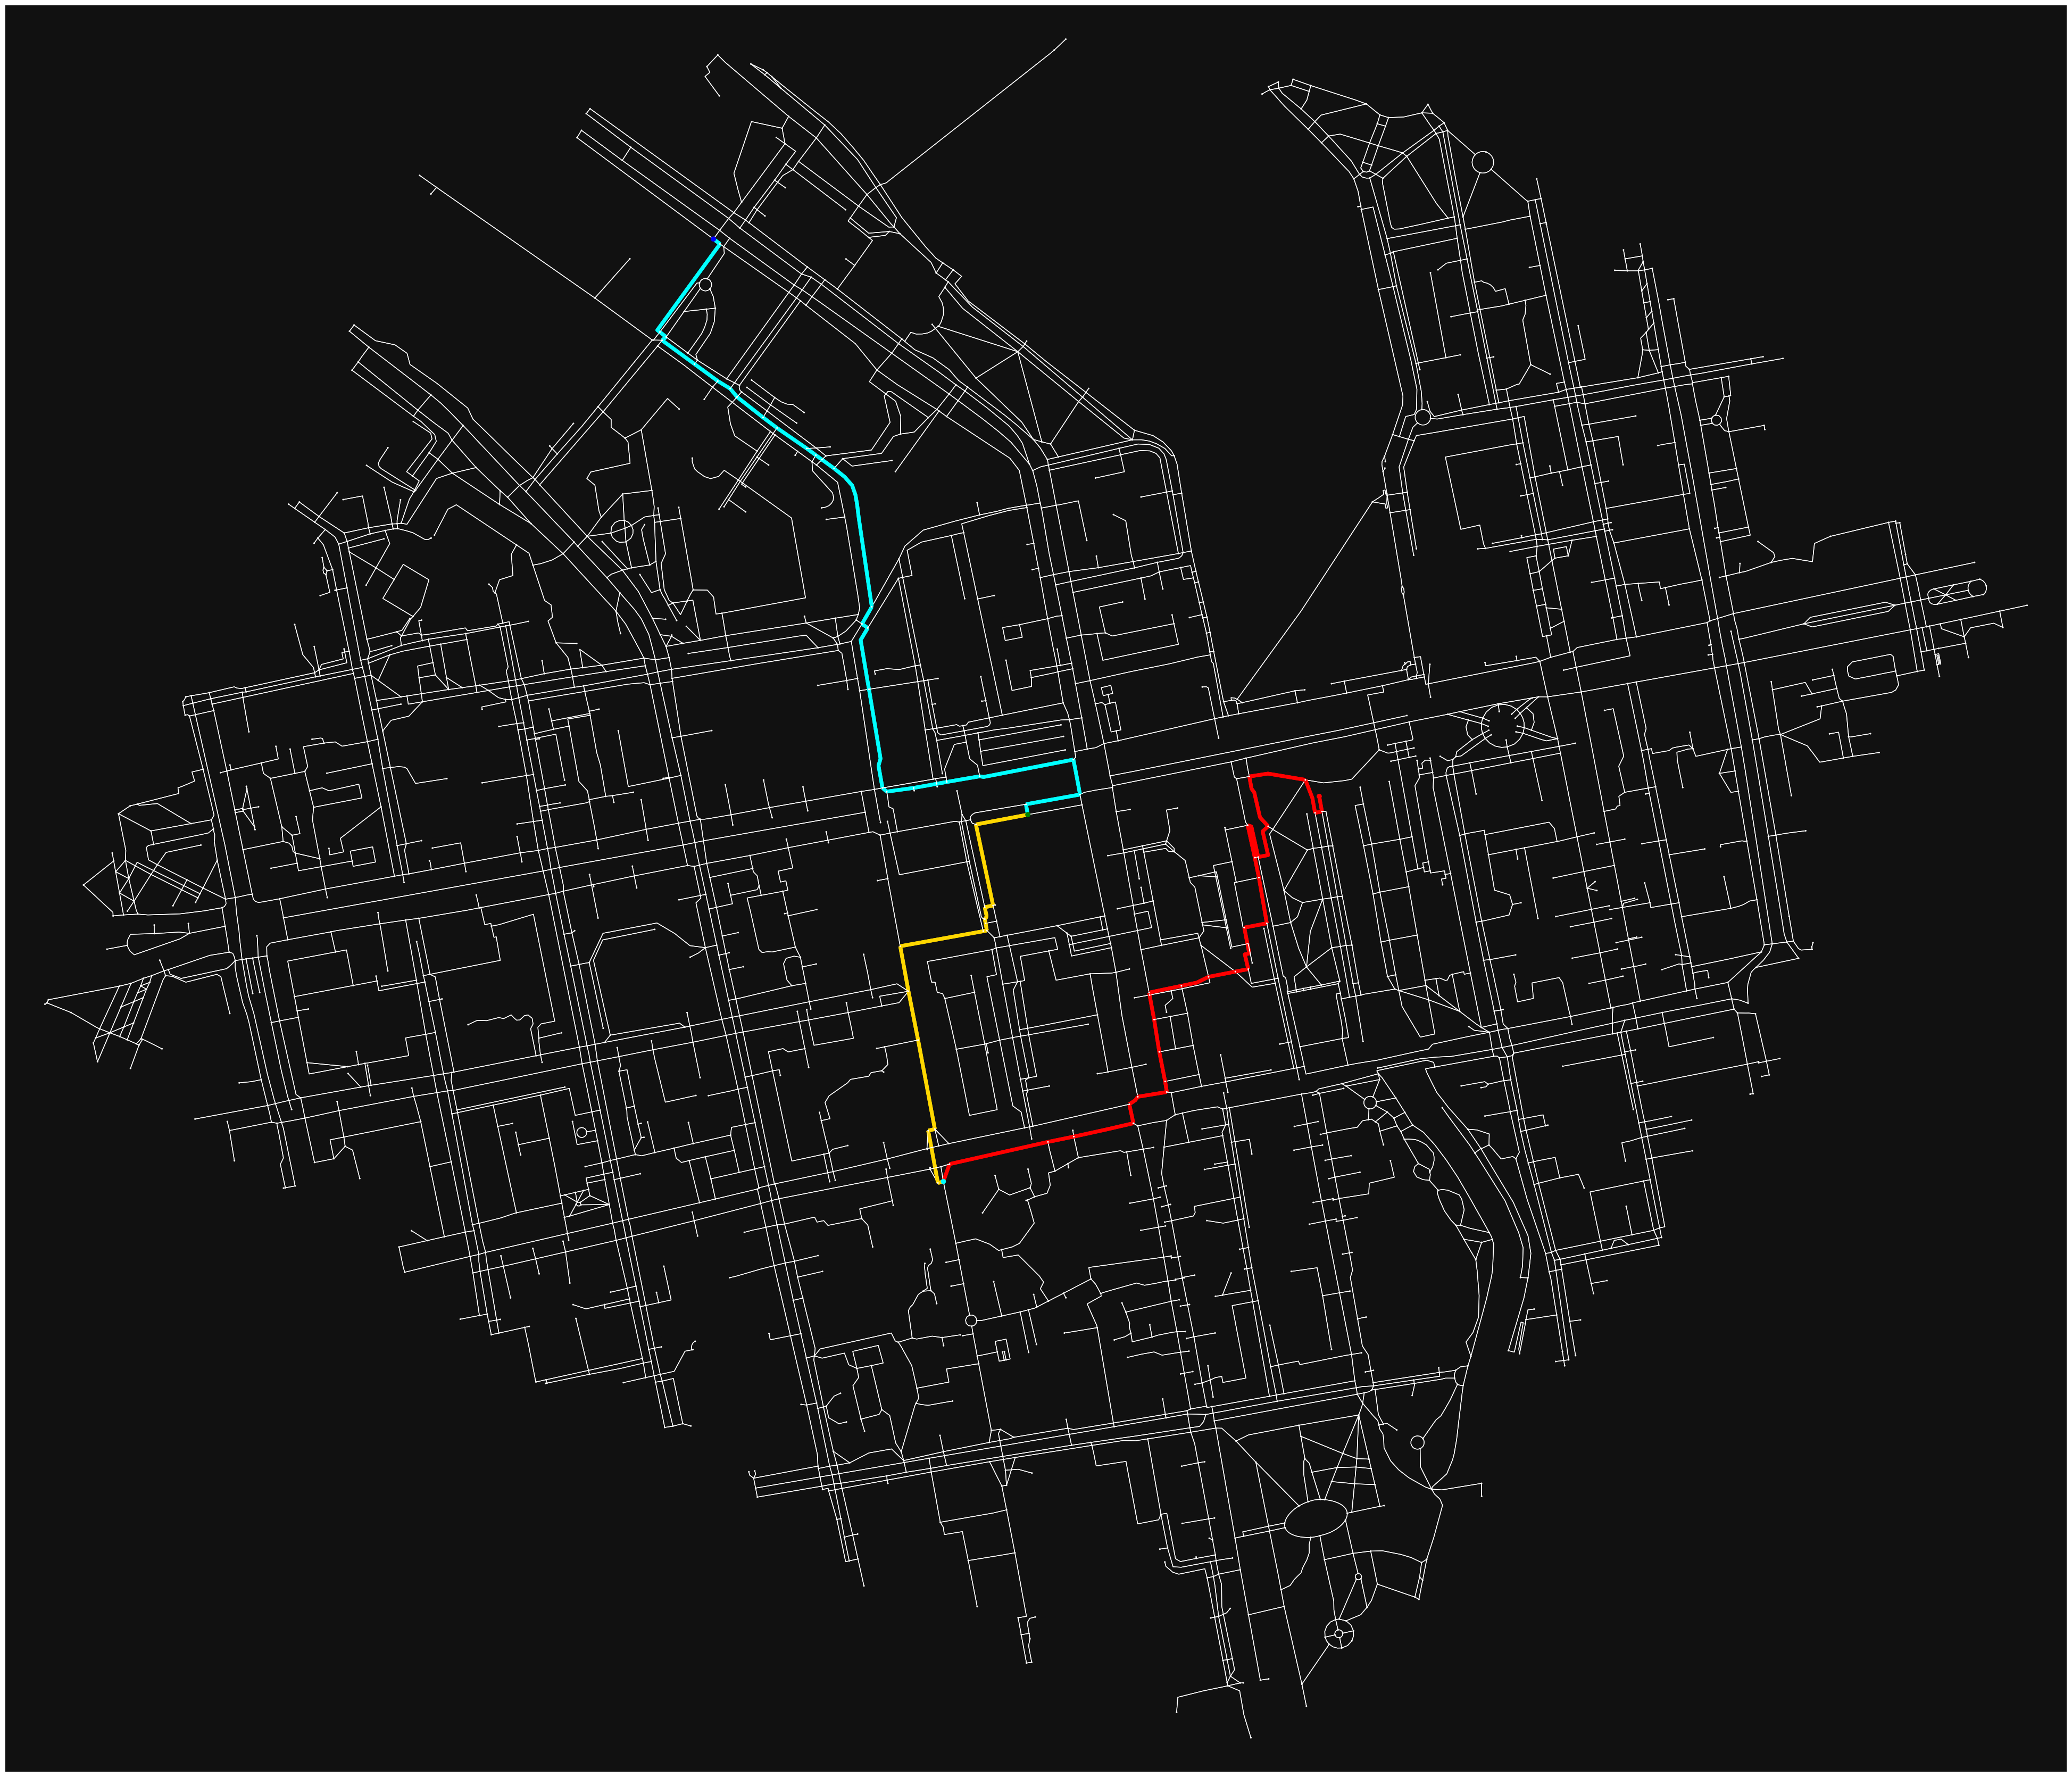

In [ ]:
G = ox.graph.graph_from_point(attractions['Здание_администрации'], dist=1250, dist_type="network", network_type="walk")
nc = [colors[origin_nodes_transponned[node]] if node in origin_nodes.values() else "w" for node in G.nodes()]
ns = [50 if node in origin_nodes.values() else 5 for node in G.nodes()]
ec = ['cyan' if edge in path1 else 'gold' if edge in path2 else 'r' if edge in path3 else 'w' for edge in G.edges()]
elw = [5 if edge in path1 else 5 if edge in path2 else 5 if edge in path3 else 1 for edge in G.edges()]
fig, ax = ox.plot_graph(G, figsize=(50, 50), node_size=ns, node_color=nc, edge_color=ec, edge_linewidth=elw)

**построить маршрут с числом поворотов направо <=2 не удалось**